#Walmart business case

Problem statement -

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df1 = df.copy()


#Exploratory data analysis

In [4]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Observations on shape of data

In [6]:
df.shape

(550068, 10)

#Data types of all the attributes

In [7]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

#Conversion of categorical attributes to 'category'

In [8]:
df['City_Category'] = df['City_Category'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')


In [9]:
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

 # Statistical summary

In [12]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,12054.000000


In [11]:
df.describe(include='object')

,Product_ID,Stay_In_Current_City_Years
count,550068,550068
unique,3631,5
top,P00265242,1
freq,1880,193821


According to the results above, the Product_Id P00265242 had the highest frequency, reaching 1880, indicating that it was the most frequently purchased item.

#Non-Graphical Analysis: Value counts and unique attributes

In [13]:
df['User_ID'].nunique()

5891

In [14]:
df['User_ID'].unique()


array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [15]:
df.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [16]:
df.Product_Category.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [17]:
df.Age.unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [18]:
df.Age.value_counts()


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [19]:
df.City_Category.nunique()

3

In [20]:
df.City_Category.unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [21]:
df['Gender'].value_counts(normalize = True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

The results above show that 75% of the purchases come from males, and 25% of purchases come from females

In [22]:
df['Occupation'].value_counts(normalize=True)*100


4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

From the above results, we can find the top 3 most purchases comes from the occupation 4, 0 and 7.

In [24]:
np.round(df['Age'].value_counts(normalize = True)*100,2)

26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64

From the above results, we can find that the most purchases are made by the individuals in the age category of 26-35.

In [32]:
# perecentage share of each gender and unique customers
df_dist_cust = pd.DataFrame(df.groupby(by=['Gender'])['User_ID'].nunique().rename('unique_customers'))
df_dist_cust['percentage'] = np.round(df_dist_cust['unique_customers']/sum(df_dist_cust['unique_customers'])*100,2)
df_dist_cust.reset_index()

,Gender,unique_customers,percentage
0,F,1666,28.28
1,M,4225,71.72


From the above table it is clear that female purchase is almost 28% and male percentage is almost 72%

In [34]:
#average no of transactions made by each gender
df_gender = pd.DataFrame(df.groupby(by='Gender')['User_ID'].count().rename('Total_transactions'))
df_gender['unique_customers'] = df_dist_cust['unique_customers']
df_gender['avg_no_trns'] = np.round(df_gender['Total_transactions']/(df_gender['unique_customers']),2)
df_gender.reset_index()


,Gender,Total_transactions,unique_customers,avg_no_trns
0,F,135809,1666,81.52
1,M,414259,4225,98.05


On an average, females make 82 transactions and males make 98 transactions

In [39]:
#revenue generated by each gender
df_revenue = pd.DataFrame(df.groupby(by='Gender')['Purchase'].sum().rename('total_purchase_amount'))
df_revenue['percent share'] = np.round(df_revenue['total_purchase_amount']/sum(df_revenue['total_purchase_amount'])*100,2)
df_revenue.reset_index()


,Gender,total_purchase_amount,percent share
0,F,1186232642,23.28
1,M,3909580100,76.72


Revenue generated by

Females = 23%

Males = 77%

In [41]:
# city vs purchase analysis
df_city = pd.DataFrame(df.groupby(by ='City_Category')['Purchase'].sum().rename('total_purchase'))
df_city['% revenue_share'] =np.round(df_city['total_purchase']/sum(df_city['total_purchase'])*100,2)
df_city.reset_index()


,City_Category,total_purchase,% revenue_share
0,A,1316471661,25.83
1,B,2115533605,41.52
2,C,1663807476,32.65


 City B is generating more revenue share

In [46]:
#age vs purchase
df_age = pd.DataFrame(df.groupby('Age')['Purchase'].sum().rename('Total_purchase'))
df_age['% percent_share'] = np.round(df_age['Total_purchase']/sum(df_age['Total_purchase'])*100,2)
df_age.reset_index()

,Age,Total_purchase,% percent_share
0,0-17,134913183,2.65
1,18-25,913848675,17.93
2,26-35,2031770578,39.87
3,36-45,1026569884,20.15
4,46-50,420843403,8.26
5,51-55,367099644,7.20
6,55+,200767375,3.94


78% of total purchases comes from individuals in 18-45 age category

In [47]:
df.Product_Category.nunique()

20

df.info

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(3), object(2)
memory usage: 23.6+ MB


In [54]:
# product_category vs purchase
df_product_cat = pd.DataFrame(df.groupby(by = 'Product_Category')['Purchase'].sum('Purchase').rename('Total_purchasing_value'))
df_product_cat['percent_share'] = np.round(df_product_cat['Total_purchasing_value']/sum(df_product_cat['Total_purchasing_value'])*100,2)
df_product_cat=df_product_cat.sort_values(by=['percent_share'], ascending=False)
df_product_cat['cumulative_percentage_sum'] = df_product_cat['percent_share'].cumsum()
df2=df_product_cat.head(10).reset_index()
df2


,Product_Category,Total_purchasing_value,percent_share,cumulative_percentage_sum
0,1,1910013754,37.48,37.48
1,5,941835229,18.48,55.96
2,8,854318799,16.77,72.73
3,6,324150302,6.36,79.09
4,2,268516186,5.27,84.36
5,3,204084713,4.00,88.36
6,16,145120612,2.85,91.21
7,11,113791115,2.23,93.44
8,10,100837301,1.98,95.42
9,15,92969042,1.82,97.24


Top 10 product revenue share


# Visual analysis
#Univariate


<Axes: title={'center': 'Product revenue share'}, xlabel='Product_Category', ylabel='percent_share'>

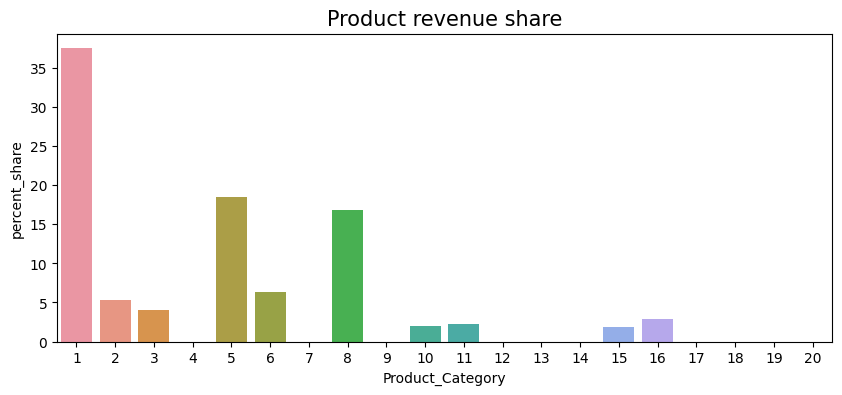

In [184]:
#percentage of revenue shared by top 10 products
plt.figure(figsize =(10,4))
plt.title('Product revenue share',fontsize = 15,color = 'Black')
sns.barplot(data = df2, x = df2.head(10)["Product_Category"],y = "percent_share" )

<Axes: ylabel='Purchase'>

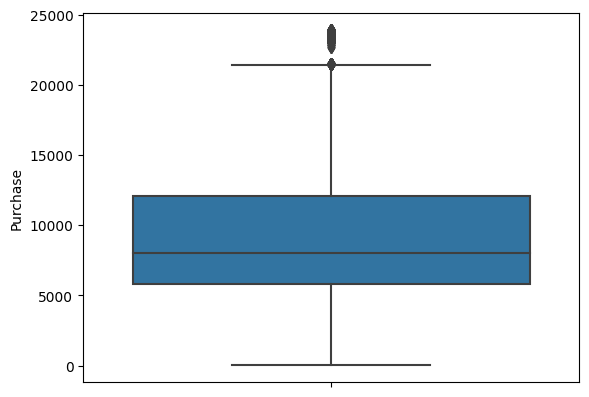

In [67]:
#purchase
sns.boxplot(data= df, y='Purchase')


In [69]:
np.median(df['Purchase'])

8047.0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(3), object(2)
memory usage: 23.6+ MB


<Axes: xlabel='Age', ylabel='count'>

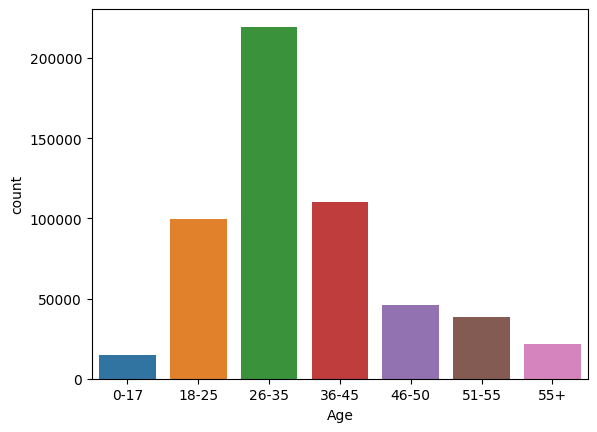

In [92]:
sns.countplot(x = 'Age', data = df)

<Axes: xlabel='Gender', ylabel='count'>

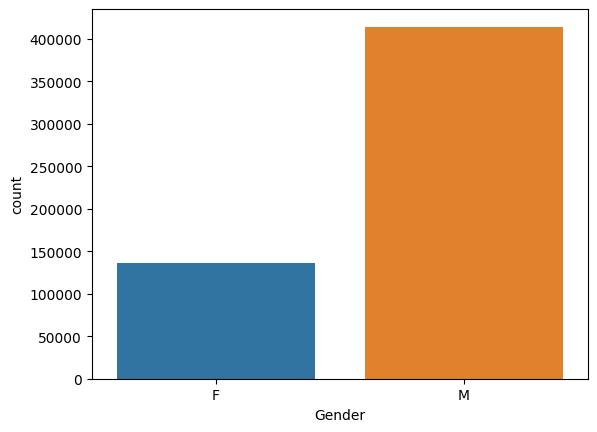

In [95]:
sns.countplot(x = 'Gender', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

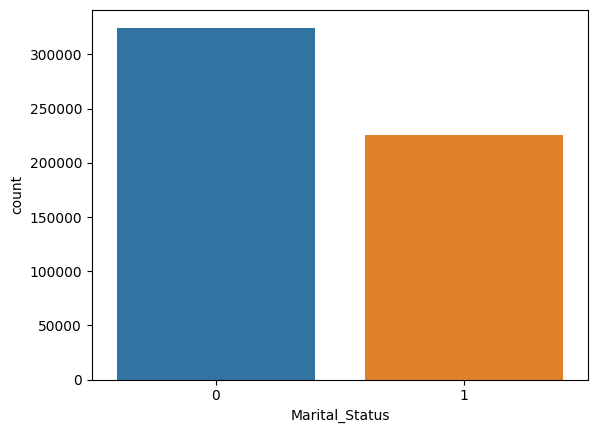

In [99]:
# Counting Marital Status
sns.countplot(data = df, x = "Marital_Status", order = df["Marital_Status"].value_counts().index)


In [101]:
df5 = pd.DataFrame(df.groupby('Product_ID')['Purchase'].sum().rename('Total_purchase'))
df5

,Total_purchase
Product_ID,
P00000142,12837476
P00000242,3967496
P00000342,1296475
P00000442,441173
P00000542,807212
...,...
P0099442,2870383
P0099642,83710
P0099742,991948


<Axes: xlabel='Product_Category', ylabel='count'>

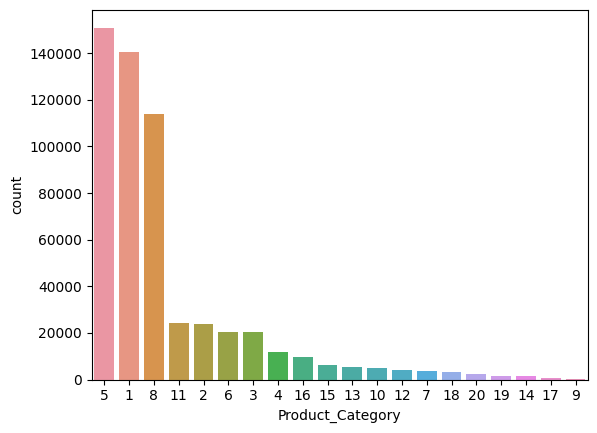

In [103]:
# Checking the count of product categories
sns.countplot(data = df, x = "Product_Category", order = df["Product_Category"].value_counts().index)

The top 3 most purchased product category is 5, 1 and 8.

<Axes: xlabel='City_Category', ylabel='count'>

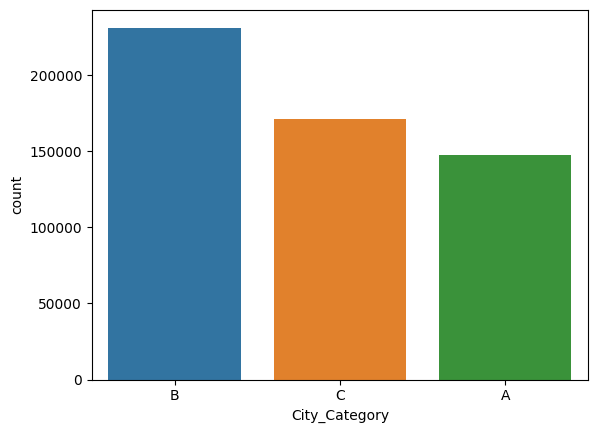

In [104]:
# Distribution of Age
sns.countplot(data = df, x = "City_Category", order = df["City_Category"].value_counts().index)

<Axes: xlabel='Occupation', ylabel='count'>

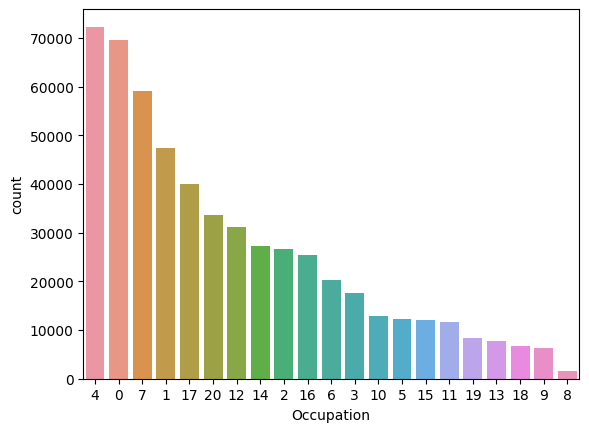

In [105]:
#occupation analysis
sns.countplot(data = df, x = "Occupation", order = df["Occupation"].value_counts().index)

<Axes: xlabel='Age', ylabel='Purchase'>

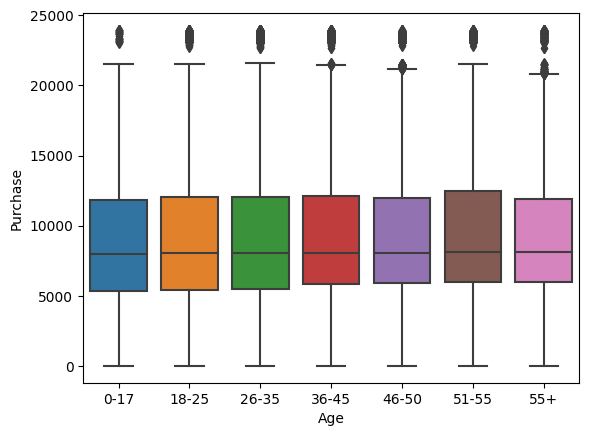

In [106]:
# checking which age group having more purchases
sns.boxplot(data = df, x = "Age", y = "Purchase")

<Axes: xlabel='Gender', ylabel='Purchase'>

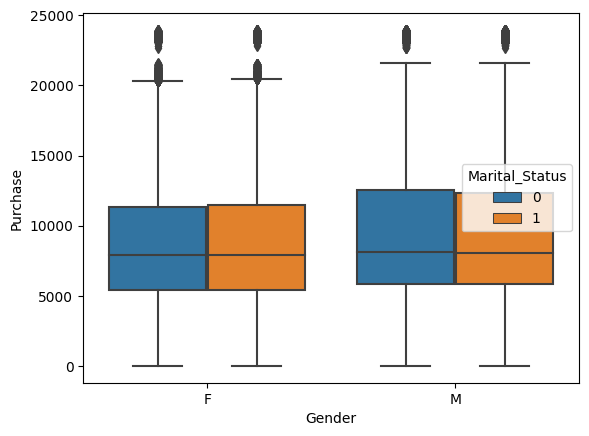

In [115]:

# Which Gender tends to shop more on Black Friday sale
sns.boxplot(data = df, x = "Gender", y = "Purchase",hue = 'Marital_Status')


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

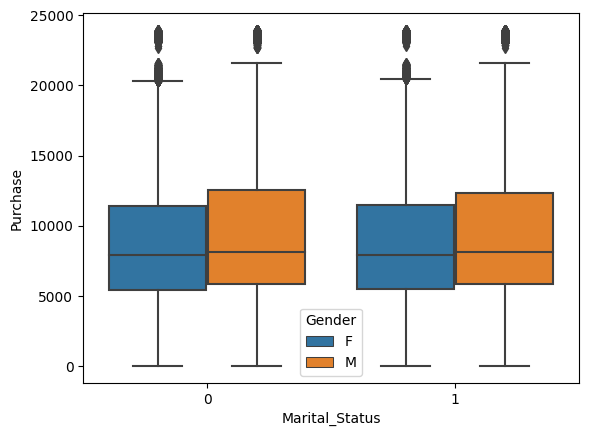

In [119]:
# Which marital status tends to do more shopping and less shopping
sns.boxplot(data = df, x= "Marital_Status", y = "Purchase",hue='Gender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

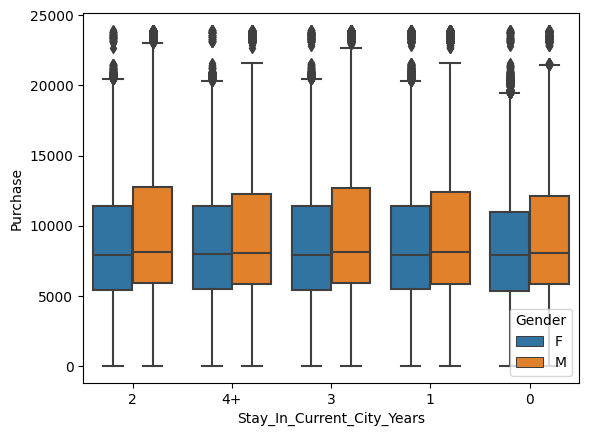

In [120]:
sns.boxplot(data = df, x= "Stay_In_Current_City_Years", y = "Purchase",hue='Gender')

In [121]:
# We can see how much is being spent by which age group
pd.crosstab(df["Purchase"],df["Age"])

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Purchase,,,,,,,
12,3,20,29,23,12,7,7
13,3,17,50,16,10,5,5
14,2,19,33,19,7,13,2
24,5,21,46,22,9,8,7
25,5,16,34,25,12,12,9
...,...,...,...,...,...,...,...
23956,0,0,1,0,0,0,0
23958,0,2,0,0,0,1,1
23959,0,0,1,0,0,1,0


In [122]:
df1.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<Axes: >

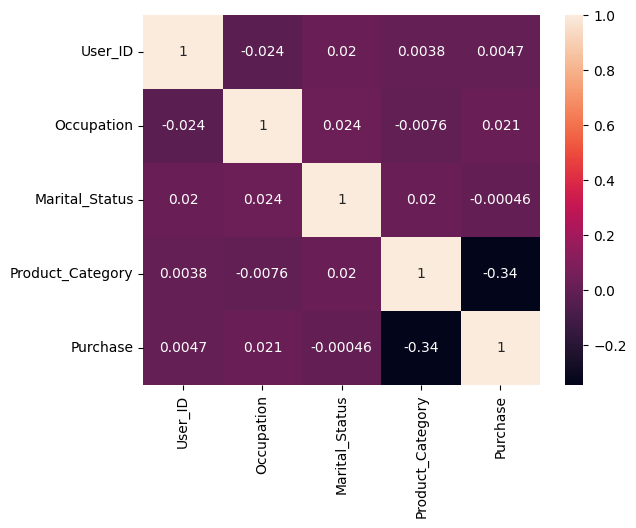

In [126]:
sns.heatmap(data=df1.corr(), annot=True)

Heatmap for depicting co-relation amongst variables: Higher the value, higher the co-relation between those variables.

#Missing values and outlier detection:

In [127]:
# Checking whether there are any missing values present or not
df.isna().sum(axis = 0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<Axes: xlabel='Purchase'>

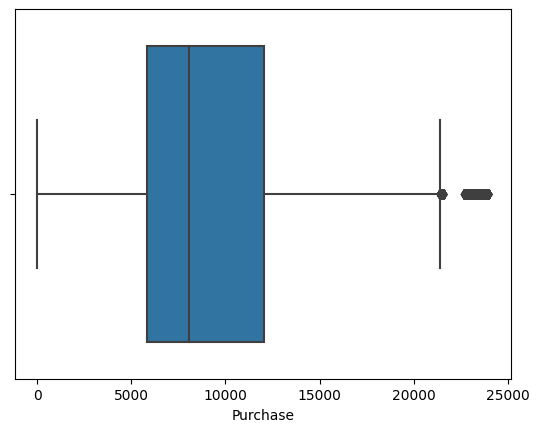

In [128]:
# Checking Outliers
sns.boxplot(data = df, x = "Purchase")

In [129]:
# here we can clearly noticed that outliers are located more than 21000
#finding count of outliers in purchase
df.loc[df["Purchase"]>21000]["Purchase"].count()

3541

3541 outliers are found in purchase amounts

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(3), object(2)
memory usage: 23.6+ MB


# Business Insights based on Non- Graphical and Visual Analysis

**Comments on the range of attributes**

1. There are 550068 rows and 10 columns.

2. Column names are User_ID,  Product_ID,  Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category and Purchase.

3. User_id, Occupation,Marital_Status,Product_Category and Purchase are of integer.

4. Product_id,Gender,Age,City_Category,Stay_In_Current_City_Years are of String or Object data types.

5. Occupation and Marital_Status are given in masked form.

6. Statistics of the Purchase columns:
      - Mean : 9263.9687
      - Standard deviation : 5023.0653
      - Minimum value : 12
      - Maximum value : 23961

7. There are 5891 unique User_id who did the purchase during black friday sale.

8. There are 3631 unique product_ids.

9. There are only 2 genders presents : Male and Female.

10. There are only two values present in Marital Status column 0 and 1. We are assuming that 0 represents unmarried, 1 represents married.

11. A total of 18105 purchases has been done.

12. Maximum amount spent in the purchase was 23961 and minimum amount was 12.

13. The units of money is not mentioned , since its an American organization, we are assuming the unit to be in dollars.

14. There are 7 age groups who made the puchase and they are been categorized into 0-17,18-25,26-35,36-45,45-50,50-55,55+

15. Occupation is present in masked form , maximum number of people purchasing item are from with mask 4.

16. A total number of 18105 unique purchases have been made.

**Comment on the distribution of variables:**

1. User with userid = 1001680 made the highest number of purchases i.e 1026.

2. User with userid = 1000708 made the lowest number of purchases i.e 6.

3. Most sold out product is P00265242 with 1880 units sold out.

4. Least sold products were P00314842, P00298842 , P00231642, P00204442 and  P00066342 with only a single unit sold.

5. There are approximately 414259 Males and 135809 who did the purchase on black friday sale.

6. Maximum number of purchases were made in the age bracket of 26 - 35 i.e 219587.

7. Two age groups i.e minors and senior citizens made the minimum purchase.

8. Since, occupation is masked, we can only say that maximum number of people  are doing the job with mask 4.

9. We have assumed that 0 represents single and 1 represents married, so, there are 324731 single people making purchase and 225337 married people making purchase.


**Comment on each univariate and bivariate:**

1. Age group of 26 - 35 is present mostly and age group of 0 -17 is present least.

2. Females are too less as compared to Males.

3. There are 20 product categories whereas the product category 5 is most purchased and product category 9 is least purchased.

4. There is not much difference in selling units of product categories 18,20,19,14,7,9.

5. If we assume 0 as unmarried and 1 as married, then unmarried people are more inclined towards purchasing more.

6. Highest number of the customers who purchased on Black Friday are from City B, then city C and then city A.

7. Most of the customers purchasing during the Black Friday sale are from occupation mask 4.


#Are women spending more money per transaction than men? Why or Why not?

In [131]:
df.groupby("Gender")["Purchase"].agg(["min","max","count","sum"]).reset_index()


,Gender,min,max,count,sum
0,F,12,23959,135809,1186232642
1,M,12,23961,414259,3909580100


There is not much difference in maximum amount spent by a female and male.

There is a huge difference in count and sum of purchases which indicates that males are purchasing more and also spending more.

#Confidence intervals and distribution of the mean of the expenses by female and male customers

In [132]:
df_female = df[df["Gender"]=="F"]
df_female

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [134]:
sample_size = 8000
iterations = 5000

male_sample_df = [ df[df["Gender"] == "M"].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [133]:
sample_size = 8000
iterations = 5000

female_sample_df = [ df[df["Gender"] == "F"].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [135]:
print(male_sample_df)

[9396.07525, 9334.556875, 9470.165875, 9358.634625, 9407.0615, 9415.607375, 9485.143, 9415.05275, 9523.1475, 9522.016875, 9355.557, 9396.37825, 9433.41925, 9448.44125, 9403.481, 9512.245375, 9505.627, 9521.05225, 9438.59425, 9385.84725, 9346.928625, 9399.899375, 9549.6265, 9489.6, 9482.5885, 9457.559125, 9481.76625, 9475.979, 9474.261375, 9465.660875, 9453.465, 9490.767875, 9505.700125, 9424.114375, 9415.39475, 9519.982875, 9281.834375, 9366.84025, 9434.965375, 9422.392, 9551.53625, 9472.110375, 9440.235, 9408.361625, 9428.8475, 9321.653875, 9433.18575, 9481.260375, 9432.333, 9448.19375, 9373.521375, 9343.7535, 9439.6245, 9451.152, 9372.051875, 9315.922375, 9425.36, 9598.56625, 9532.516875, 9414.538875, 9414.141625, 9420.98925, 9440.318875, 9321.839125, 9382.01725, 9426.87375, 9431.5345, 9520.09675, 9408.927, 9425.7455, 9439.211, 9443.244875, 9536.318375, 9386.294375, 9479.9735, 9474.62425, 9460.87075, 9463.765, 9442.972875, 9378.96925, 9413.393, 9443.58725, 9477.181875, 9474.20425, 94

In [136]:
print(female_sample_df)

[8661.12325, 8757.943, 8789.591875, 8745.623, 8743.83775, 8648.613625, 8757.217125, 8540.328, 8701.80875, 8777.949875, 8743.688875, 8761.047375, 8711.261625, 8768.572625, 8802.51075, 8808.359625, 8728.7005, 8751.85925, 8738.32075, 8813.790125, 8724.89175, 8749.676, 8720.523625, 8766.109375, 8811.5755, 8780.369375, 8804.360125, 8821.4655, 8771.902875, 8790.82325, 8698.047375, 8657.482125, 8780.22925, 8699.08375, 8593.119875, 8684.77975, 8717.99375, 8698.36675, 8715.46225, 8735.70325, 8756.413625, 8789.606375, 8762.209375, 8720.808625, 8710.629125, 8735.33125, 8783.430125, 8795.339875, 8780.561125, 8743.045125, 8789.2495, 8759.495125, 8763.055625, 8803.900125, 8775.92075, 8735.449625, 8784.272625, 8676.016125, 8743.966125, 8747.931, 8703.58225, 8800.09775, 8839.515875, 8742.62325, 8751.234875, 8787.512125, 8744.909, 8769.25175, 8774.04875, 8696.947625, 8770.84275, 8871.528625, 8775.8125, 8680.4435, 8649.23375, 8689.11675, 8710.0445, 8714.014625, 8683.341125, 8739.7525, 8677.931375, 8711.

<Axes: ylabel='Count'>

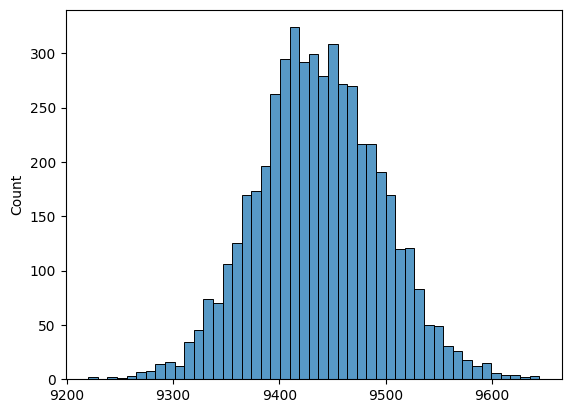

In [137]:
sns.histplot(male_sample_df)

<Axes: ylabel='Count'>

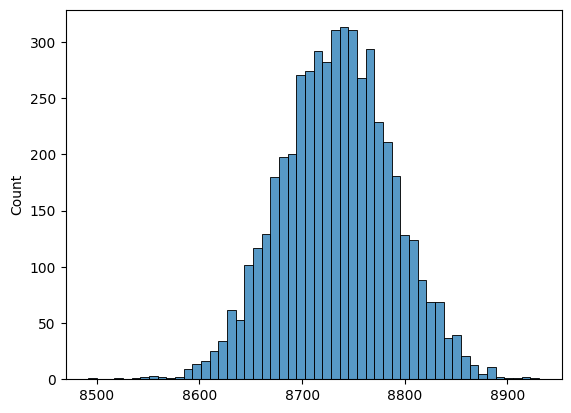

In [138]:
sns.histplot(female_sample_df)

In [139]:
# CONFIDENCE INTERVAL FOR male_sample_df(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(male_sample_df,5),2)
upper_limit_90 = np.round(np.percentile(male_sample_df, 95),2)

lower_limit_95 = np.round(np.percentile(male_sample_df,2.5),2)
upper_limit_95 = np.round(np.percentile(male_sample_df, 97.5),2)

lower_limit_99 = np.round(np.percentile(male_sample_df,0.5),2)
upper_limit_99 = np.round(np.percentile(male_sample_df, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9342.12, 9532.45)
The 95% confidence interval is : (9324.31, 9553.19)
The 99% confidence interval is : (9286.92, 9596.09)


In [140]:
# CONFIDENCE INTERVAL FOR female_sample_df(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(female_sample_df,5),2)
upper_limit_90 = np.round(np.percentile(female_sample_df, 95),2)

lower_limit_95 = np.round(np.percentile(female_sample_df,2.5),2)
upper_limit_95 = np.round(np.percentile(female_sample_df, 97.5),2)

lower_limit_99 = np.round(np.percentile(female_sample_df,0.5),2)
upper_limit_99 = np.round(np.percentile(female_sample_df, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")


The 90% confidence interval is : (8646.81, 8823.23)
The 95% confidence interval is : (8628.55, 8839.54)
The 99% confidence interval is : (8596.1, 8869.47)


Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Answer :

With **99%** confidence intervals we can say that the average male spending is higher than average females spending and they do not overlap. The histogram also indicates the same. walmart can give some discounts for female purchases so that the female average spending will increase.


#Results when the same activity is performed for Married vs Unmarried

In [141]:
sample_size = 5000
iterations = 1000

married_sample_df = [ df[df["Marital_Status"] == 1].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [142]:
sample_size = 5000
iterations = 1000

unmarried_sample_df = [ df[df["Marital_Status"] == 0].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [143]:
print(married_sample_df)

[9318.2822, 9277.276, 9272.9544, 9329.1102, 9398.5722, 9256.4898, 9332.0922, 9225.533, 9217.1164, 9285.2658, 9224.8858, 9102.8956, 9229.9218, 9219.4928, 9292.0158, 9267.6458, 9238.0548, 9301.7172, 9314.295, 9199.1232, 9203.8196, 9223.3024, 9225.2298, 9184.811, 9246.6356, 9268.0716, 9214.3982, 9206.4376, 9310.979, 9254.379, 9341.7408, 9286.8574, 9168.392, 9307.6458, 9328.6672, 9361.1876, 9247.8474, 9226.309, 9202.9632, 9184.539, 9182.8532, 9166.4112, 9248.7782, 9211.5332, 9320.7326, 9264.7488, 9256.8944, 9225.3352, 9145.2608, 9380.1358, 9184.454, 9304.7558, 9394.3508, 9125.6408, 9300.2686, 9272.3536, 9383.4516, 9275.953, 9367.1606, 9343.4326, 9292.7818, 9380.8924, 9169.532, 9262.5202, 9244.9852, 9378.4794, 9225.877, 9274.3752, 9404.433, 9226.5864, 9226.6424, 9280.3282, 9229.6074, 9338.5506, 9313.2992, 9240.366, 9233.0264, 9224.6904, 9339.5192, 9210.012, 9246.477, 9344.8844, 9211.4068, 9189.4236, 9304.0184, 9246.0784, 9137.7802, 9265.516, 9243.5754, 9238.5902, 9367.4318, 9239.7768, 9393.

In [144]:
print(unmarried_sample_df)


[9219.8014, 9263.5144, 9310.0392, 9300.6474, 9201.2578, 9317.0756, 9194.4144, 9397.349, 9307.9598, 9373.6266, 9304.5088, 9180.177, 9146.9796, 9242.6822, 9342.7774, 9227.8864, 9339.7032, 9282.3532, 9258.8714, 9357.0314, 9330.849, 9213.7372, 9326.1866, 9211.8612, 9230.9934, 9222.3174, 9220.8168, 9272.5902, 9255.4782, 9242.5284, 9331.1274, 9345.8788, 9246.7908, 9188.958, 9265.397, 9231.3616, 9304.4996, 9123.7946, 9222.1586, 9441.3018, 9331.6512, 9229.3062, 9292.5096, 9253.7764, 9260.326, 9226.457, 9389.0342, 9274.027, 9392.2156, 9200.2452, 9373.9328, 9232.2138, 9304.697, 9317.5324, 9262.6376, 9289.243, 9214.8456, 9140.4988, 9220.2676, 9323.411, 9295.987, 9218.97, 9184.2098, 9299.2288, 9326.8944, 9198.5886, 9215.3536, 9398.904, 9339.2216, 9371.8612, 9266.1162, 9480.6406, 9383.3426, 9199.2346, 9266.4358, 9307.6822, 9358.8418, 9212.1614, 9178.809, 9478.5688, 9298.2918, 9462.65, 9257.1334, 9256.629, 9360.0182, 9164.165, 9195.3234, 9086.0844, 9326.7548, 9353.93, 9169.6718, 9161.1044, 9297.8852

<Axes: ylabel='Count'>

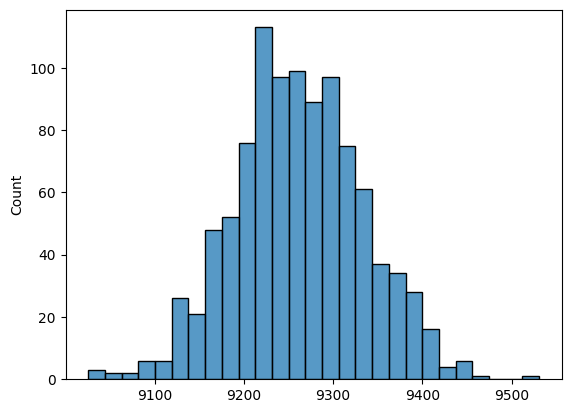

In [145]:
sns.histplot(married_sample_df)

<Axes: ylabel='Count'>

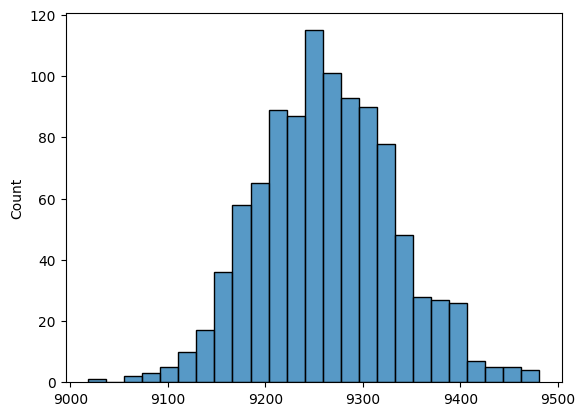

In [146]:
sns.histplot(unmarried_sample_df)

In [147]:
# CONFIDENCE INTERVAL FOR married_sample_df(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(married_sample_df,5),2)
upper_limit_90 = np.round(np.percentile(married_sample_df, 95),2)

lower_limit_95 = np.round(np.percentile(married_sample_df,2.5),2)
upper_limit_95 = np.round(np.percentile(married_sample_df, 97.5),2)

lower_limit_99 = np.round(np.percentile(married_sample_df,0.5),2)
upper_limit_99 = np.round(np.percentile(married_sample_df, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9140.7, 9383.49)
The 95% confidence interval is : (9126.51, 9402.25)
The 99% confidence interval is : (9079.7, 9442.48)


In [148]:
# CONFIDENCE INTERVAL FOR unmarried_sample_df(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(unmarried_sample_df,5),2)
upper_limit_90 = np.round(np.percentile(unmarried_sample_df, 95),2)

lower_limit_95 = np.round(np.percentile(unmarried_sample_df,2.5),2)
upper_limit_95 = np.round(np.percentile(unmarried_sample_df, 97.5),2)

lower_limit_99 = np.round(np.percentile(unmarried_sample_df,0.5),2)
upper_limit_99 = np.round(np.percentile(unmarried_sample_df, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9157.24, 9385.8)
The 95% confidence interval is : (9134.9, 9401.84)
The 99% confidence interval is : (9091.86, 9450.21)


From above two plot and confidence interval results, we can see that the married individuals purchases is equal to unmarried individuals purchases and confidence intervals of average married individuals and average unmarried individuals spending is overlapping, Hence we can conclude that the difference between the two groups is not statistically significant.


#Results when the same activity is performed for Age

In [165]:
#Seperating age into diffrent dataframes
age_0to17 = df.loc[df["Age"]== "0-17"]
age_18to25 = df.loc[df["Age"]== "18-25"]
age_26to35 = df.loc[df["Age"] == "26-35"]
age_36to45 = df.loc[df["Age"] == "36-45"]
age_46to50 = df.loc[df["Age"] == "46-50"]
age_51to55 = df.loc[df["Age"]== "51-55"]
age_55plus = df.loc[df["Age"]== "55+"]


In [150]:
age_0to17.shape

(15102, 10)

In [151]:
#Age 0 - 17
sample_size = 15102
iterations = 1000

age_0to17_sample = [ df[df["Age"] == '0-17'].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [154]:
age_18to25.shape

(99660, 10)

In [155]:
#Age 18 - 25
sample_size = 99660
iterations = 1000

age_18to25_sample = [ df[df["Age"] == '18-25'].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [156]:
age_26to35.shape

(219587, 10)

In [157]:
#Age 26 - 35
sample_size = 219587
iterations = 1000

age_26to35_sample = [ df[df["Age"] == '26-35'].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [158]:
age_36to45.shape

(110013, 10)

In [159]:
#Age 36 - 45
sample_size = 110013
iterations = 1000

age_36to45_sample = [ df[df["Age"] == '36-45'].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [160]:
age_46to50.shape

(45701, 10)

In [161]:
#Age 46 - 50
sample_size = 45701
iterations = 1000

age_46to50_sample = [ df[df["Age"] == '46-50'].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [162]:
age_51to55.shape

(38501, 10)

In [163]:
#Age 51 - 55
sample_size = 38501
iterations = 1000

age_51to55_sample = [ df[df["Age"] == '51-55'].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

In [166]:
age_55plus.shape

(21504, 10)

In [167]:
#Age 55+
sample_size = 21504
iterations = 1000

age_55plus_sample = [ df[df["Age"] == '55+'].sample(sample_size, replace = True)["Purchase"].mean()  for i in range(iterations)]

<Axes: ylabel='Count'>

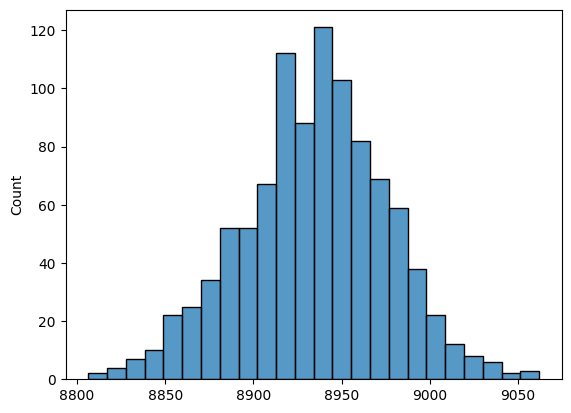

In [168]:
sns.histplot(age_0to17_sample)

<Axes: ylabel='Count'>

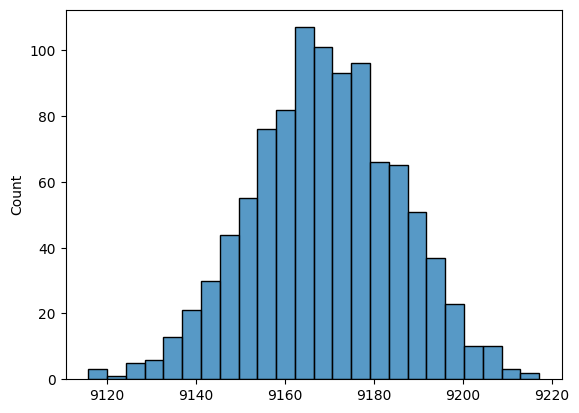

In [169]:
sns.histplot(age_18to25_sample)

<Axes: ylabel='Count'>

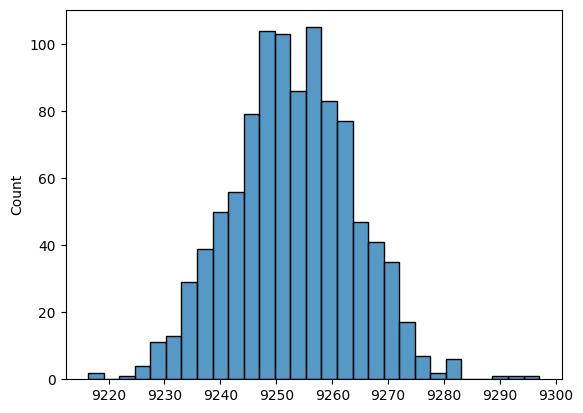

In [170]:
sns.histplot(age_26to35_sample)

<Axes: ylabel='Count'>

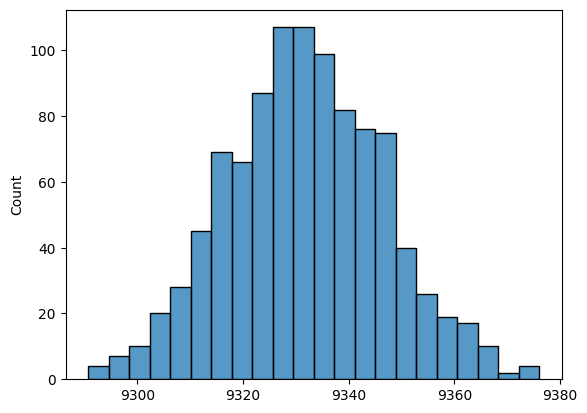

In [171]:
sns.histplot(age_36to45_sample)

<Axes: ylabel='Count'>

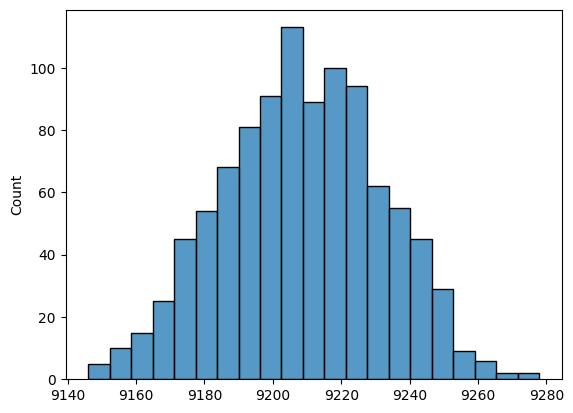

In [172]:
sns.histplot(age_46to50_sample)

<Axes: ylabel='Count'>

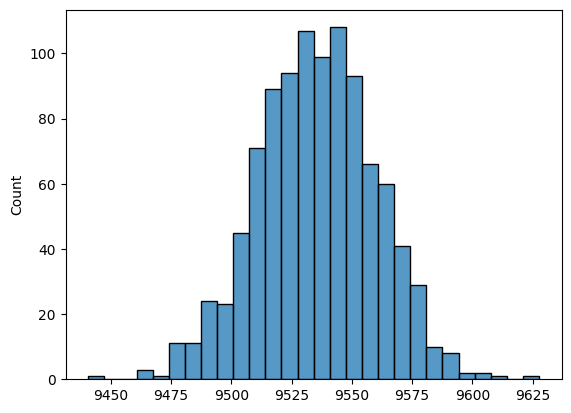

In [173]:
sns.histplot(age_51to55_sample)

<Axes: ylabel='Count'>

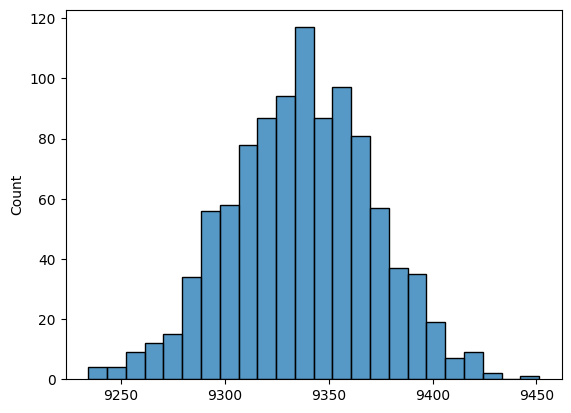

In [174]:
sns.histplot(age_55plus_sample)

In [175]:
# CONFIDENCE INTERVAL FOR age_0to17_sample(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(age_0to17_sample,5),2)
upper_limit_90 = np.round(np.percentile(age_0to17_sample, 95),2)

lower_limit_95 = np.round(np.percentile(age_0to17_sample,2.5),2)
upper_limit_95 = np.round(np.percentile(age_0to17_sample, 97.5),2)

lower_limit_99 = np.round(np.percentile(age_0to17_sample,0.5),2)
upper_limit_99 = np.round(np.percentile(age_0to17_sample, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (8862.67, 8998.93)
The 95% confidence interval is : (8850.09, 9015.61)
The 99% confidence interval is : (8826.24, 9034.27)


In [176]:
# CONFIDENCE INTERVAL FOR age_18to25_sample(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(age_18to25_sample,5),2)
upper_limit_90 = np.round(np.percentile(age_18to25_sample, 95),2)

lower_limit_95 = np.round(np.percentile(age_18to25_sample,2.5),2)
upper_limit_95 = np.round(np.percentile(age_18to25_sample, 97.5),2)

lower_limit_99 = np.round(np.percentile(age_18to25_sample,0.5),2)
upper_limit_99 = np.round(np.percentile(age_18to25_sample, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9141.35, 9195.73)
The 95% confidence interval is : (9135.66, 9200.23)
The 99% confidence interval is : (9125.48, 9208.38)


In [177]:
# CONFIDENCE INTERVAL FOR age_26to35_sample(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(age_26to35_sample,5),2)
upper_limit_90 = np.round(np.percentile(age_26to35_sample, 95),2)

lower_limit_95 = np.round(np.percentile(age_26to35_sample,2.5),2)
upper_limit_95 = np.round(np.percentile(age_26to35_sample, 97.5),2)

lower_limit_99 = np.round(np.percentile(age_26to35_sample,0.5),2)
upper_limit_99 = np.round(np.percentile(age_26to35_sample, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9235.12, 9270.52)
The 95% confidence interval is : (9231.17, 9273.52)
The 99% confidence interval is : (9225.8, 9281.83)


In [178]:
# CONFIDENCE INTERVAL FOR age_36to45_sample(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(age_36to45_sample,5),2)
upper_limit_90 = np.round(np.percentile(age_36to45_sample, 95),2)

lower_limit_95 = np.round(np.percentile(age_36to45_sample,2.5),2)
upper_limit_95 = np.round(np.percentile(age_36to45_sample, 97.5),2)

lower_limit_99 = np.round(np.percentile(age_36to45_sample,0.5),2)
upper_limit_99 = np.round(np.percentile(age_36to45_sample, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9307.57, 9356.84)
The 95% confidence interval is : (9303.58, 9361.92)
The 99% confidence interval is : (9297.06, 9370.27)


In [179]:
# CONFIDENCE INTERVAL FOR age_46to50_sample(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(age_46to50_sample,5),2)
upper_limit_90 = np.round(np.percentile(age_46to50_sample, 95),2)

lower_limit_95 = np.round(np.percentile(age_46to50_sample,2.5),2)
upper_limit_95 = np.round(np.percentile(age_46to50_sample, 97.5),2)

lower_limit_99 = np.round(np.percentile(age_46to50_sample,0.5),2)
upper_limit_99 = np.round(np.percentile(age_46to50_sample, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9170.01, 9245.67)
The 95% confidence interval is : (9163.05, 9251.57)
The 99% confidence interval is : (9152.51, 9263.47)


In [180]:
# CONFIDENCE INTERVAL FOR age_51to55_sample(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(age_51to55_sample,5),2)
upper_limit_90 = np.round(np.percentile(age_51to55_sample, 95),2)

lower_limit_95 = np.round(np.percentile(age_51to55_sample,2.5),2)
upper_limit_95 = np.round(np.percentile(age_51to55_sample, 97.5),2)

lower_limit_99 = np.round(np.percentile(age_51to55_sample,0.5),2)
upper_limit_99 = np.round(np.percentile(age_51to55_sample, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9494.0, 9574.75)
The 95% confidence interval is : (9485.97, 9580.86)
The 99% confidence interval is : (9474.09, 9595.89)


In [181]:
# CONFIDENCE INTERVAL FOR age_55plus_sample(90%, 95%, 99%)
lower_limit_90 = np.round(np.percentile(age_55plus_sample,5),2)
upper_limit_90 = np.round(np.percentile(age_55plus_sample, 95),2)

lower_limit_95 = np.round(np.percentile(age_55plus_sample,2.5),2)
upper_limit_95 = np.round(np.percentile(age_55plus_sample, 97.5),2)

lower_limit_99 = np.round(np.percentile(age_55plus_sample,0.5),2)
upper_limit_99 = np.round(np.percentile(age_55plus_sample, 99.5),2)

print(f"The 90% confidence interval is : {(lower_limit_90,upper_limit_90)}")
print(f"The 95% confidence interval is : {(lower_limit_95,upper_limit_95)}")
print(f"The 99% confidence interval is : {(lower_limit_99,upper_limit_99)}")

The 90% confidence interval is : (9281.79, 9393.53)
The 95% confidence interval is : (9268.81, 9402.32)
The 99% confidence interval is : (9247.35, 9419.95)


#Final Insights

1. Maximum number of purchases were made in the age bracket of 26- 35.

2. Least purchases, were made in the group of 0 - 17.

3. Number of males who purchased during the sale is approximately 2.5 times more than females, we may assume that males tend to purchase more during festive sale than females.

4. Age groups making purchases follows a guassian distribution. We can see that minimum number of purchases were made by age group of 0 - 17 followed by 18 - 25 and then maximum sales by 26 - 35 . After this the curve has started declining towards the age group of 36 - 45 which is followed by 46 - 50, 51 - 55 and 55+.

5. City B is generating more revenue share, followed by city C and then city A.

6. People with occupation with mask 4 are the ones who are purchasing more, we may assume that they are from highest earning brackets and people with occupation mask 3 is least purchasing during the sale, we may assume that they are from lowest earning bracket.

7. We can see that minimum amount spent by a female and male is same.

8. There is also not much difference in maximum amount spent by a female and male.

9. There is a huge difference in count and sum of purchases which indicates that males tend to purchase more on black friday sale.

10. We can see that mean of entire female population is 8734.94 while for male population the mean is 9437.15. we can say that males are spending more than females.

13. Mean value for the age-group of 26-35 for entire population may be assumed as 9253.15.

#Recommendations

1. With **99%** confidence intervals we can say that the average male spending is higher than average female spending and they do not overlap. The histogram also indicates the same. walmart can give some discounts for female purchases so that the female average spending will increase.

2. We can see that the married individuals purchases is equal to unmarried individuals purchases and confidence intervals of average married individuals spendings and average unmarried individuals spendings is overlapping, Hence we can conclude that the difference between the two groups is not statistically significant.

3. The charts indicate that the percentage share of purchase of age group 0-17 and 55+ is low so walmart should concentrate its marketing efforts on individuals who tend to spend more like age group between 18-45.

4. The top 3 most purchased product category is 5, 1 and 8.We can either provide discounts for these products or concentrate the marketing efforts on other product categories to increase sales.


5. Since, most of the purchases are from occupation 4, we may assume the following that either the occupation from 4 may be in finance , technology or investment banking. Given this assumption is correct, walmart shall provide discount on the products that are useful for their professional lives as well such as technology gagdets.

6. Walmart shall open more retail stores in city B. As they are the ones spending more.
